# 📊 Exploratory Data Analysis (EDA)

### 📌 What is EDA?
Exploratory Data Analysis (EDA) is the process of analyzing datasets to:
- Understand the structure of the data
- Identify patterns and relationships
- Detect missing values and outliers
- Prepare data for further analysis or modeling


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

## 🔹 Part 1: Basic Questions

### 📦 1. How Big Is the Dataset?

#### 🧠 Code Used
- `df.shape`  
Returns the number of rows and columns in the dataset.

#### 📊 Output
- **Rows:** 891  
- **Columns:** 12  

#### 📝 Explanation
The dataset contains **891 passenger records** and **12 features**, including the target variable `Survived`.  
This is a medium-sized dataset, suitable for both analysis and machine learning models.


In [3]:
df.shape

(891, 12)

### 👀 2. How Does the Data Look?

#### 🧠 Code Used
- `df.sample(5)`  
Displays 5 random rows from the dataset to get an unbiased overview.

#### 📊 Output (Sample)
The dataset includes columns such as:
- PassengerId
- Survived
- Pclass
- Name
- Sex
- Age
- SibSp
- Parch
- Ticket
- Fare
- Cabin
- Embarked

#### 📝 Explanation
This step helps us understand:
- The type of information stored
- Presence of categorical and numerical features
- Real-world nature of missing values (e.g., Age, Cabin)


In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
589,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.0500,NaN,S
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
580,581,1,2,"Christy, Miss. Julie Rachel",female,25.0,1,1,237789,30.0000,NaN,S
799,800,0,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S


### 🏷️ 3. What Are the Data Types of Columns?

#### 🧠 Code Used
- `df.info()`  
Provides column names, data types, non-null counts, and memory usage.

#### 📊 Output Summary
- **Numerical Columns (int/float):**
  - PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare
- **Categorical Columns (object):**
  - Name, Sex, Ticket, Cabin, Embarked

#### 📝 Explanation
- `Age`, `Cabin`, and `Embarked` contain missing values
- Categorical columns need encoding before model training
- No incorrect data types detected


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### ❓ 4. Are There Any Missing Values?

#### 🧠 Code Used
- `df.isnull().sum()`  
Counts missing values in each column.

#### 📊 Output
- Age → 177 missing values  
- Cabin → 687 missing values  
- Embarked → 2 missing values  
- All other columns → 0 missing values

#### 📝 Explanation
- **Cabin** has too many missing values and may be dropped
- **Age** can be filled using mean or median
- **Embarked** can be filled using mode


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 📐 5. How Does the Data Look Mathematically?

#### 🧠 Code Used
- `df.describe()`  
Generates descriptive statistics for numerical columns.

#### 📊 Key Observations
- Mean Age ≈ 29.7 years
- Average Fare ≈ 32.2
- Minimum Fare = 0
- Survival Rate ≈ 38%

#### 📝 Explanation
- Wide fare range indicates possible outliers
- Survival mean confirms class imbalance
- Age distribution suggests young and middle-aged passengers dominate


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### ♻️ 6. Are There Duplicate Values?

#### 🧠 Code Used
- `df.duplicated().sum()`  
Counts the number of duplicate rows.

#### 📊 Output
- **Duplicate rows:** 0

#### 📝 Explanation
No duplicate records are present, so no action is required in this step.


In [8]:
df.duplicated().sum()

np.int64(0)

### 🔗 7. How Is the Correlation Between Columns?

#### 🧠 Code Used
- `df.corr()['Survived']`  
Calculates correlation of all numerical features with the target variable.

#### 📊 Output (Important Correlations)
- Pclass → -0.34 (Negative correlation)
- Fare → +0.26 (Positive correlation)
- SibSp → -0.04 (Weak)
- Parch → +0.08 (Weak)
- Age → -0.08 (Weak)

#### 📝 Explanation
- Passengers in higher classes had better survival chances
- Higher fare indicates higher survival probability
- Age and family size show weak influence


In [10]:
df.select_dtypes(include=['number']).corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


## 🔹 Part 2: Univariate Analysis

### 📌 What is Univariate EDA?

#### 📖 Definition
Univariate analysis is the process of studying **one variable at a time** to understand its:
- Distribution
- Central tendency
- Spread
- Patterns and anomalies

In a dataset, **each column is treated as a separate variable**, and univariate EDA is performed **independently** for every column.


In [47]:
import seaborn as sns

### 🏷️ Univariate EDA for Categorical Variables

#### 🎯 Objective
To understand:
- Total number of observations
- Frequency of each category
- Which categories dominate the dataset
- Whether the data is balanced or imbalanced


#### 📊 Diagram: Countplot

##### 🛠️ Function Used
- `sns.countplot()`

##### 📖 What does a countplot show?
A countplot displays:
- Categories on one axis
- Frequency (count) on the other axis

#### 🧠 Why is it useful?
- Visual comparison between categories
- Easy identification of dominant classes
- Better than tables for quick insights

📌 Countplots are preferred over raw counts when explaining results visually.


<Axes: xlabel='count', ylabel='Embarked'>

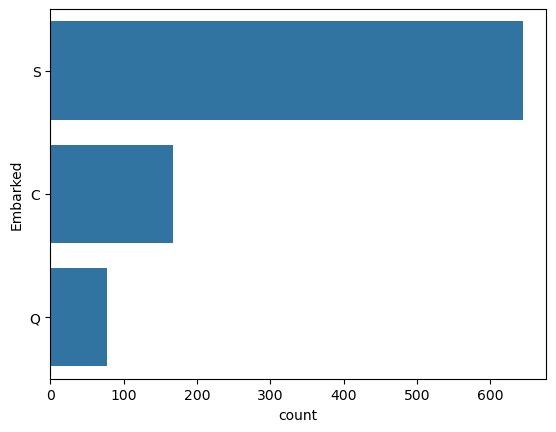

In [48]:
sns.countplot(df['Embarked'])
#df['Survived'].value_counts().plot(kind='bar')

#### 🥧 Diagram: Pie Chart

##### 🛠️ Function Used
- `plt.pie()` with percentage labels

##### 📖 What does a pie chart show?
- Proportion (percentage) of each category
- Relative contribution of each category to the whole dataset

##### 🧠 Why is it useful?
- Helps understand dominance in percentage terms
- Useful for presentation and reports

⚠️ Pie charts are best used when the number of categories is small.


<Axes: ylabel='count'>

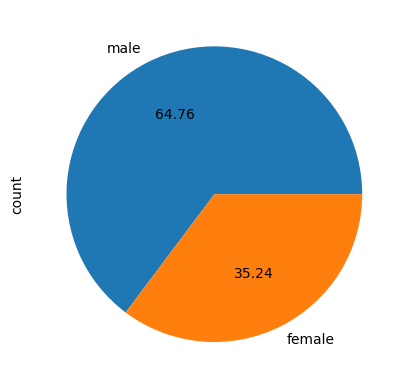

In [50]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

### 🔢 Univariate EDA for Numerical Variables

#### 🎯 Objective
To understand:
- Minimum and maximum values
- Average (mean / median)
- Spread of data
- Distribution shape
- Presence of outliers


#### 📈 Diagram: Histogram / Distplot

##### 🛠️ Functions Used
- `plt.hist()`
- `sns.histplot()`
- `sns.distplot()` (Histogram + KDE)

#### 📖 What does it show?
- Frequency distribution of values
- Shape of data (normal, skewed, bimodal)

#### 🧠 Why is it useful?
- Helps identify skewness (left or right)
- Shows concentration of values
- KDE curve approximates the probability density function (PDF)


(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

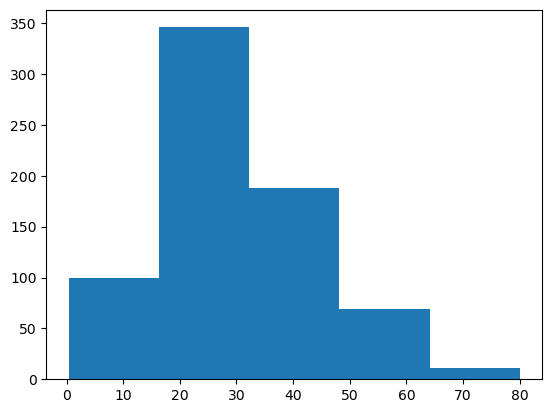

In [52]:
import matplotlib.pyplot as plt
plt.hist(df['Age'],bins=5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23956\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

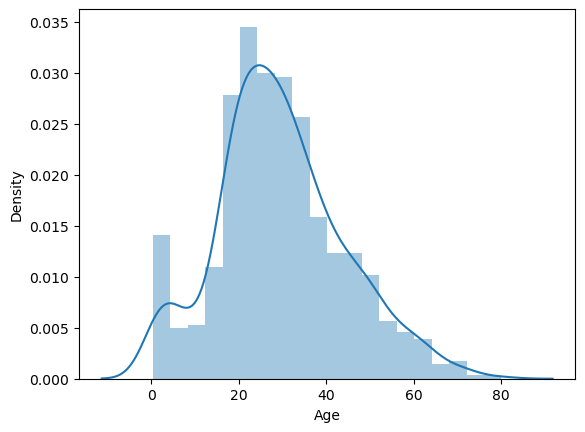

In [53]:
sns.distplot(df['Age'])

#### 📦 Diagram: Boxplot

##### 🛠️ Function Used
- `sns.boxplot()`

##### 📖 What does a boxplot show?
A boxplot provides the **five-number summary**:
- Minimum
- First Quartile (Q1)
- Median
- Third Quartile (Q3)
- Maximum

##### 📐 Interquartile Range (IQR)
IQR = Q3 − Q1

##### 🚨 Outlier Rule
Values outside the range:
[Q1 − 1.5 × IQR , Q3 + 1.5 × IQR]
are treated as **potential outliers**.

##### 🧠 Why is it important?
- Outliers can distort mean and variance
- They may require removal or transformation during modeling


<Axes: ylabel='Age'>

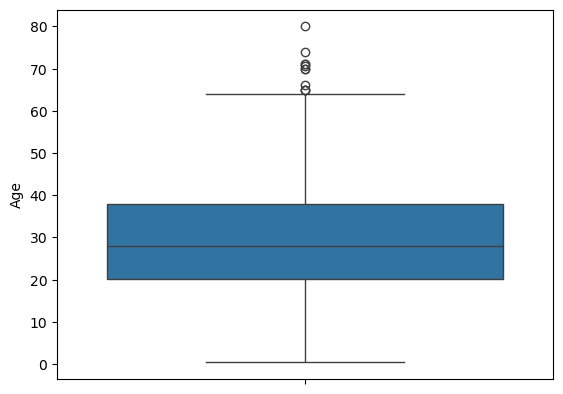

In [54]:
sns.boxplot(df['Age'])

In [59]:
df['Age'].min()


0.42

In [56]:
df['Age'].max()

80.0

In [57]:
df['Age'].mean()

np.float64(29.69911764705882)

In [58]:

df['Age'].skew()

np.float64(0.38910778230082704)